<a href="https://colab.research.google.com/github/a-gasior/DSA/blob/master/CleanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = 'drive/My Drive/Data Solution Analyst Case Study/Data/data.csv'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(data_path)
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes


In [104]:
df.isnull().values.any()
# no null data values

False

In [ ]:
# numeric: 
#   age
#   duration
#   campaign ->>> a cx was contacted 56 times? weird  <<<-
#   pdays
#   previous
#   emp.var.rate
#   cons.price.idx
#   cons.conf.idx
#   euribor3m
#   nr.employed
#   
# categorical
#   job [good]
#   marital [good]
#   education <-- could be split into new data columns [good]
#   defualt [good]
#   housing [good]
#   loan [good]
#   contact [good]
#   month [good]
#   day_of_week [good]
#   poutcome [good]


In [ ]:
# df.loc[:,'job'].value_counts()
# df.loc[:,'marital'].value_counts()
# df.loc[:,'education'].value_counts()
# df.loc[:,'default'].value_counts()
# df.loc[:,'housing'].value_counts()
# df.loc[:,'loan'].value_counts()
# df.loc[:,'contact'].value_counts()
# df.loc[:,'month'].value_counts()
# df.loc[:,'day_of_week'].value_counts()
# df.loc[:,'poutcome'].value_counts()

In [13]:
df.pdays.describe()

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

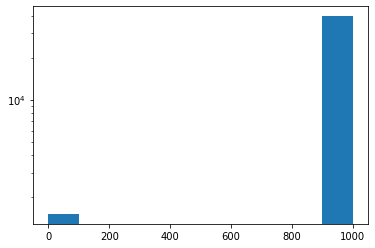

In [16]:
x,y,_ = plt.hist(df.pdays,log=True)

In [11]:
df.campaign.describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

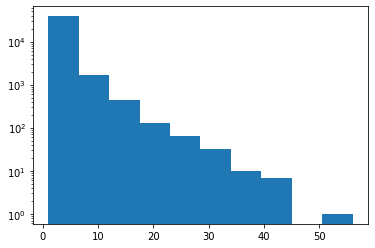

In [106]:
x,y,_ = plt.hist(df.campaign,log=True)

In [12]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

In [36]:
# df = pd.read_csv(data_path)

X_discrete = pd.DataFrame()
X_continuous = pd.DataFrame()


discrete_feature_dict = {}

for col in df.columns:
  if df[col].dtype == object:
    df[col] = df[col].astype('category')
    discrete_feature_dict[col] = dict(enumerate(df[col].cat.categories))
    if col != 'y':
      X_discrete[col] = df[col].cat.codes
  elif col != 'y' and col != 'ModelPrediction':
    X_continuous[col] = df[col]

X_whole = df
y = df.iloc[:,-2:]
y['y'] = y['y'].cat.codes


df.dtypes

age                   int64
job                category
marital            category
education          category
default            category
housing            category
loan               category
contact            category
month              category
day_of_week        category
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome           category
emp.var.rate        float64
cons.price.idx      float64
cons.conf.idx       float64
euribor3m           float64
nr.employed         float64
ModelPrediction     float64
y                  category
dtype: object

In [37]:
X_discrete

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1
41184,1,1,5,0,0,0,0,7,0,1
41185,5,1,6,0,2,0,0,7,0,1
41186,9,1,5,0,0,0,0,7,0,1


In [38]:
X_continuous

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [40]:
y

,ModelPrediction,y
0,0.932750,0
1,0.953579,0
2,0.945724,0
3,0.933875,0
4,0.940996,0
...,...,...
41183,0.567417,1
41184,0.655416,0
41185,0.574102,0
41186,0.615098,1
